Largely based on https://blog.keras.io/building-autoencoders-in-keras.html

Using a U-Net based architecture (https://arxiv.org/abs/1505.04597)

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
size = 2

In [3]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

x_train_val = x_train_val / 255.
x_test = x_test / 255.

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, random_state=314159)

In [5]:
input_img = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)

encoded = MaxPooling2D((2, 2))(x)

# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(encoded)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [7]:
encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
__________

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, x_val), 
                callbacks=[earlystopping])

Train on 37500 samples, validate on 12500 samples
Epoch 1/1000
37500/37500 [==============================] - 14s 370us/step - loss: 0.5955 - val_loss: 0.6597
Epoch 2/1000
37500/37500 [==============================] - 12s 326us/step - loss: 0.5757 - val_loss: 0.6059
Epoch 3/1000
37500/37500 [==============================] - 12s 330us/step - loss: 0.5711 - val_loss: 0.5766
Epoch 4/1000
37500/37500 [==============================] - 12s 312us/step - loss: 0.5683 - val_loss: 0.5848
Epoch 5/1000
37500/37500 [==============================] - 12s 310us/step - loss: 0.5660 - val_loss: 0.5913
Epoch 6/1000
37500/37500 [==============================] - 12s 310us/step - loss: 0.5638 - val_loss: 0.5717
Epoch 7/1000
37500/37500 [==============================] - 12s 314us/step - loss: 0.5625 - val_loss: 0.5676
Epoch 8/1000
37500/37500 [==============================] - 12s 314us/step - loss: 0.5617 - val_loss: 0.5651
Epoch 9/1000
37500/37500 [==============================] - 12s 319us/step - l

In [10]:
decoded_imgs = autoencoder.predict(x_test)

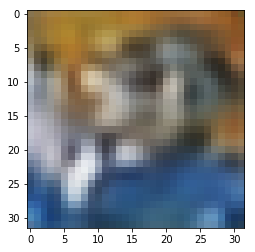

In [11]:
plt.imshow(decoded_imgs[0])

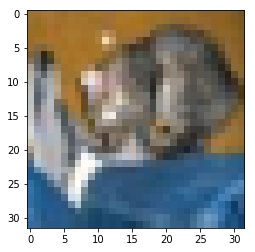

In [12]:
plt.imshow(x_test[0])

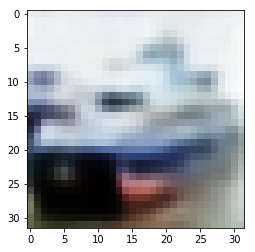

In [13]:
plt.imshow(decoded_imgs[1])

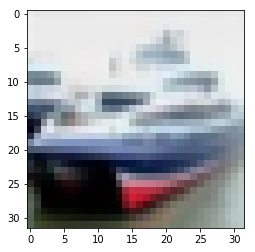

In [14]:
plt.imshow(x_test[1])

In [17]:
encoded_imgs = encoder.predict(x_train_val)

In [18]:
encoded_imgs.shape

(50000, 4, 4, 64)

In [21]:
encoded_imgs = encoded_imgs.reshape(encoded_imgs.shape[0], 
                                    encoded_imgs.shape[1] *
                                    encoded_imgs.shape[2] * 
                                    encoded_imgs.shape[3])

In [22]:
encoded_imgs.shape

(50000, 1024)

In [23]:
np.save('encode-features.npy', encoded_imgs)